In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
x1=np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,9])
x2=np.array([5,4,6,5,8,6,7,6,7,1,2,3,2,3])
x=np.array(list(zip(x1,x2))).reshape(len(x1),2)

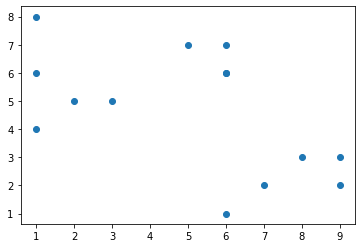

In [3]:
plt.scatter(x1,x2)
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
km=KMeans(n_clusters=2)
km.fit(x)
print(km.inertia_)
print(km.cluster_centers_)

63.822222222222216
[[7.8        2.2       ]
 [3.44444444 6.        ]]


In [6]:
centroids=km.cluster_centers_
df_c=pd.DataFrame(centroids,columns=['x','y'])
dataset=pd.DataFrame(x,columns=['x1','x2'])

In [7]:
df_c.head()

,x,y
0,7.800000,2.2
1,3.444444,6.0


In [8]:
dataset.head()

,x1,x2
0,3,5
1,1,4
2,1,6
3,2,5
4,1,8


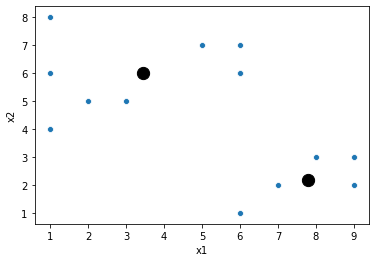

In [10]:
sns.scatterplot(x=dataset['x1'],y=dataset['x2'])
plt.scatter(df_c['x'],df_c['y'],c='black',s=150)
plt.show()

In [16]:
inertia=[]
wcss=[]
for k in range(1,7):
    km=KMeans(n_clusters=k)
    km.fit(x)
    inertia.append(km.inertia_)
    wcss.append(sum(np.min(cdist(x,km.cluster_centers_),axis=1))/x.shape[0])
    print(k,km.inertia_,sum(np.min(cdist(x,km.cluster_centers_),axis=1))/x.shape[0])

1 171.21428571428572 3.3192987718537803
2 63.822222222222216 1.9848772781772381
3 23.75 1.1569874349681442
4 16.016666666666666 0.9742186532599281
5 8.749999999999998 0.7531460844308774
6 6.583333333333334 0.6396263478682018


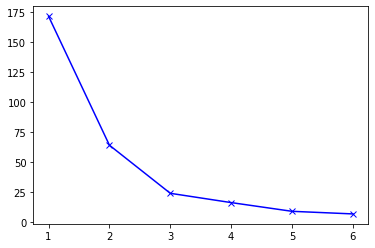

In [17]:
plt.plot([1,2,3,4,5,6],inertia,'bx-')
plt.show()

In [14]:
from scipy.spatial.distance import cdist

In [15]:
sum(np.min(cdist(x,centroids),axis=1))/x.shape[0]

1.9848772781772381

In [18]:
df=pd.read_csv('wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [19]:
df.drop(['Customer_Segment'],axis=1,inplace=True)

In [20]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
km=KMeans(n_clusters=3)
km.fit(df)
print(km.inertia_)
print(km.cluster_centers_)

2370689.686782968
[[1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]]


In [22]:
centroids=km.cluster_centers_

In [23]:
sum(np.min(cdist(df,centroids),axis=1))/x.shape[0]

1182.548529716623

In [24]:
inertia=[]
wcss=[]
for k in range(1,7):
    km=KMeans(n_clusters=k)
    km.fit(df)
    inertia.append(km.inertia_)
    wcss.append(sum(np.min(cdist(df,km.cluster_centers_),axis=1))/df.shape[0])
    print(k,km.inertia_,sum(np.min(cdist(df,km.cluster_centers_),axis=1))/df.shape[0])

1 17592296.383508474 260.5618178198896
2 4543749.614531862 133.7088421053659
3 2370689.686782968 93.00943492153215
4 1333139.2086165315 72.50382378123044
5 916379.187153917 59.935562824141826
6 648422.2834974242 51.493737827611014


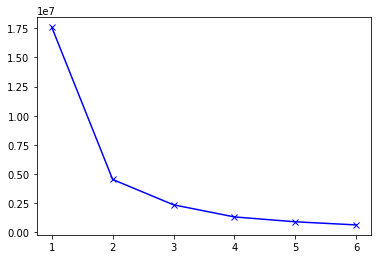

In [25]:
plt.plot([1,2,3,4,5,6],inertia,'bx-')
plt.show()